__Question:__ For the Given dataset, apply apt data pre-processing techniques 
to clean the data for further processing. Exploit the concepts discussed in 
Descriptive Statistics that relate to the data set to gain key insights 
from the data. Adopt a through exploratory data analytics approach, 
relating the various concepts and plots discussed in the course / tested in 
the lab assignments to gain key insights from the given data set. On the 
Pre-processing and EDA front adopt an exhaustive approach relating the 
maximum no of techniques / features under each set. Over the cleaned data 
set, apply the following algorithms.

Algorithm 1: DIC

Algorithm 2: K-NN Classification or Regression

Algorithm 3: k-means Clustering

Dataset Name: (1) Breast Cancer Wisconsin Data
Dataset Link: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

General Instruction: You shall apply necessary pre-processing techniques 
like discretization, binning etc to make the dataset suitable for applying 
FIM algorithm. You may also make any valid assumptions required for the 
entire exercise and state them explicitly in your documents submitted. 
Submit a complete report describing the techniques employed, code snippets 
and corresponding output as done for your lab submissions or share the 
corresponding notebook link with all data present in the file do mention 
the dataset name in your answer script.
: Based on the type of the assigned dataset, you shall either consider the 
entire set of features (or) subset of features to generate frequent 
patterns and apply predictive analytics.

# Exploratory Data Analysis

The features: 

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

Outcome:

Diagnosis: Malignant or Benign 

In [59]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [60]:
# read the dataset
df=pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [61]:
df.shape

(569, 33)

The dataset has 569 rows and 33 columns.

In [62]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We see that most of the data is of float type, and that there are 32 values that are unlabeled.

In [63]:
#description about the dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Dropping the columns without proper labels:

In [64]:
# dropping unncessary columns
df.drop("Unnamed: 32",axis=1,inplace=True)

Checking for null values:

In [65]:
#checking missing values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Comparing the number of patients with and without cancer. (M: Malignant, B: Benign)

In [66]:
fig= px.histogram(df, x='diagnosis',color='diagnosis', barmode='group')
fig.show()

Plotting the histogram of all the features:

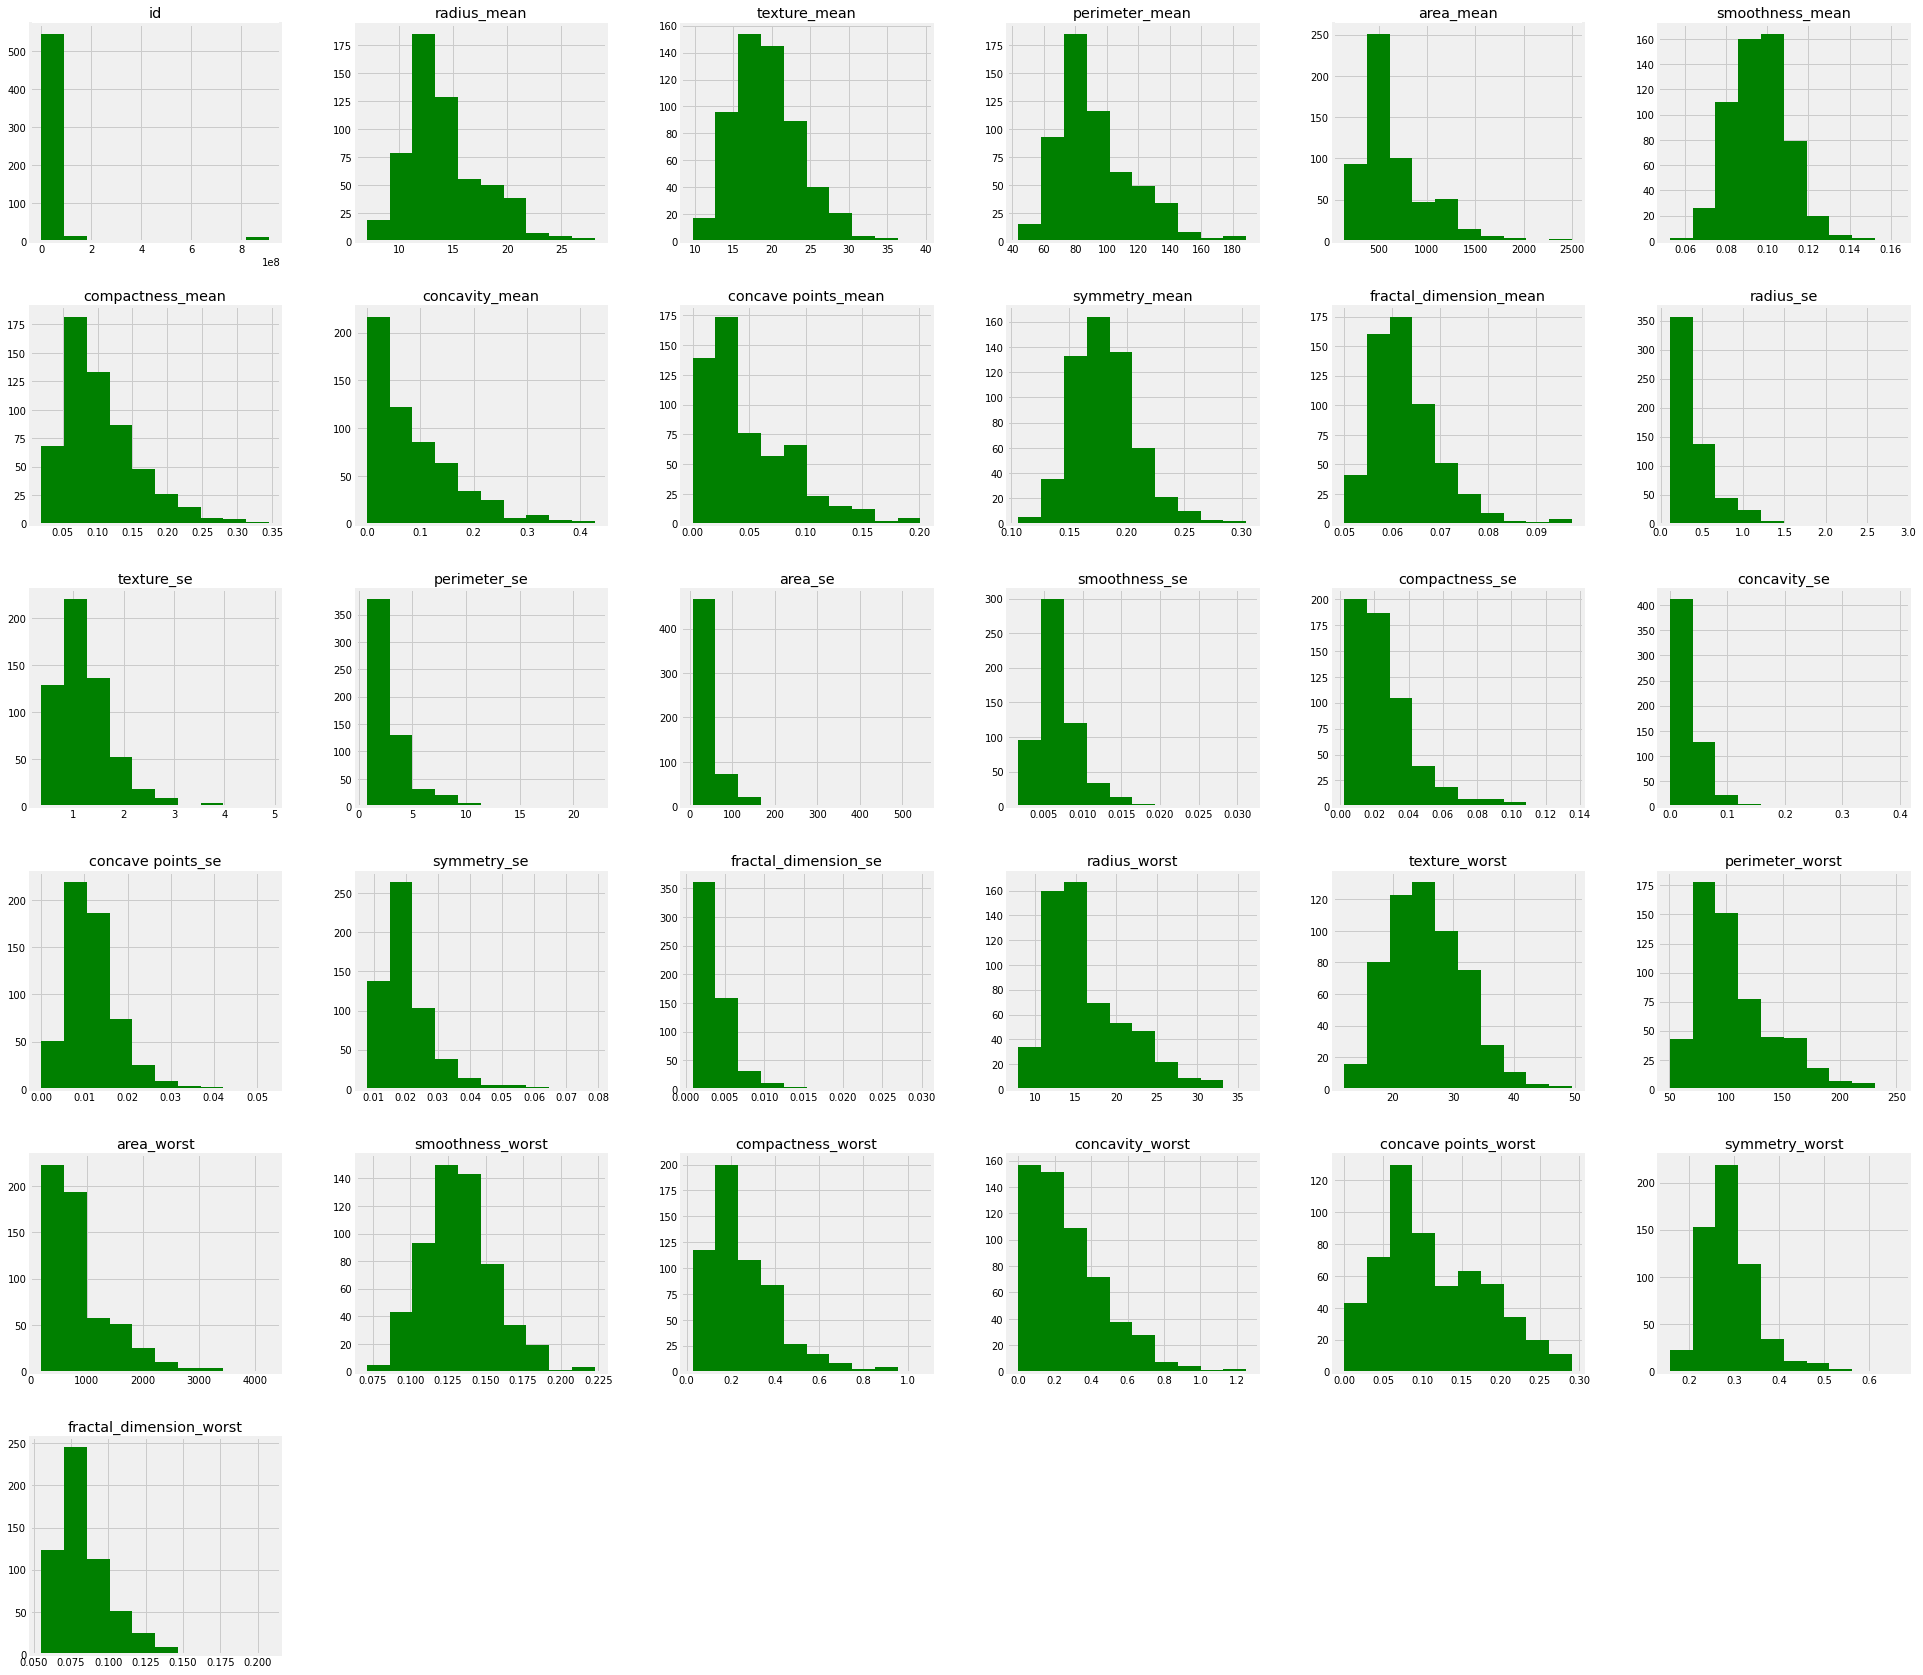

In [67]:
df.hist(figsize = (30,30), color = 'green')
plt.show()

Comparing selected features using boxplots:

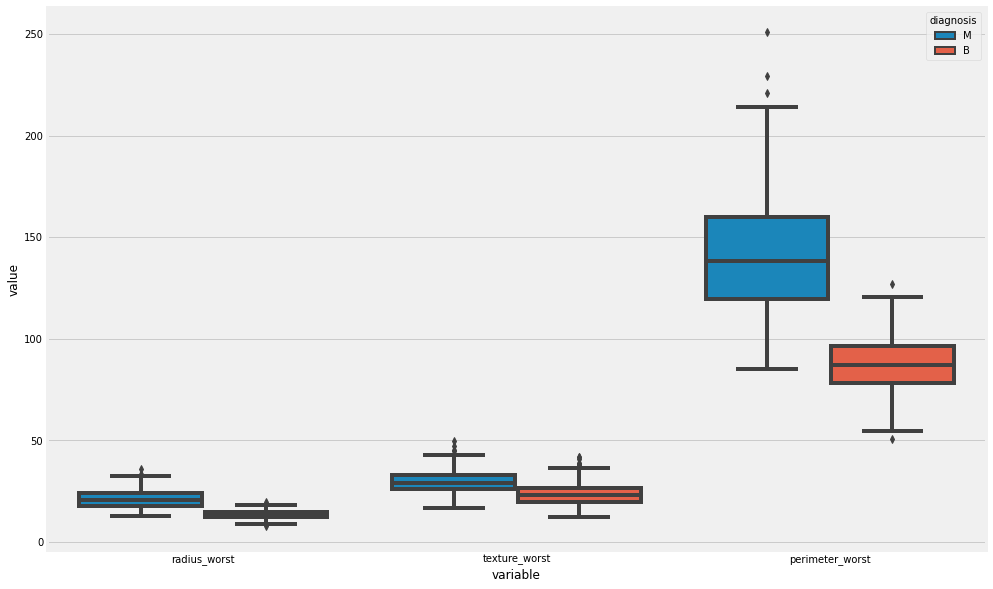

In [68]:
melted_data = pd.melt(df,id_vars = "diagnosis",value_vars = ['radius_worst', 'texture_worst', 'perimeter_worst'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

In [69]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Generating pairplots with selected features, to view correlation:

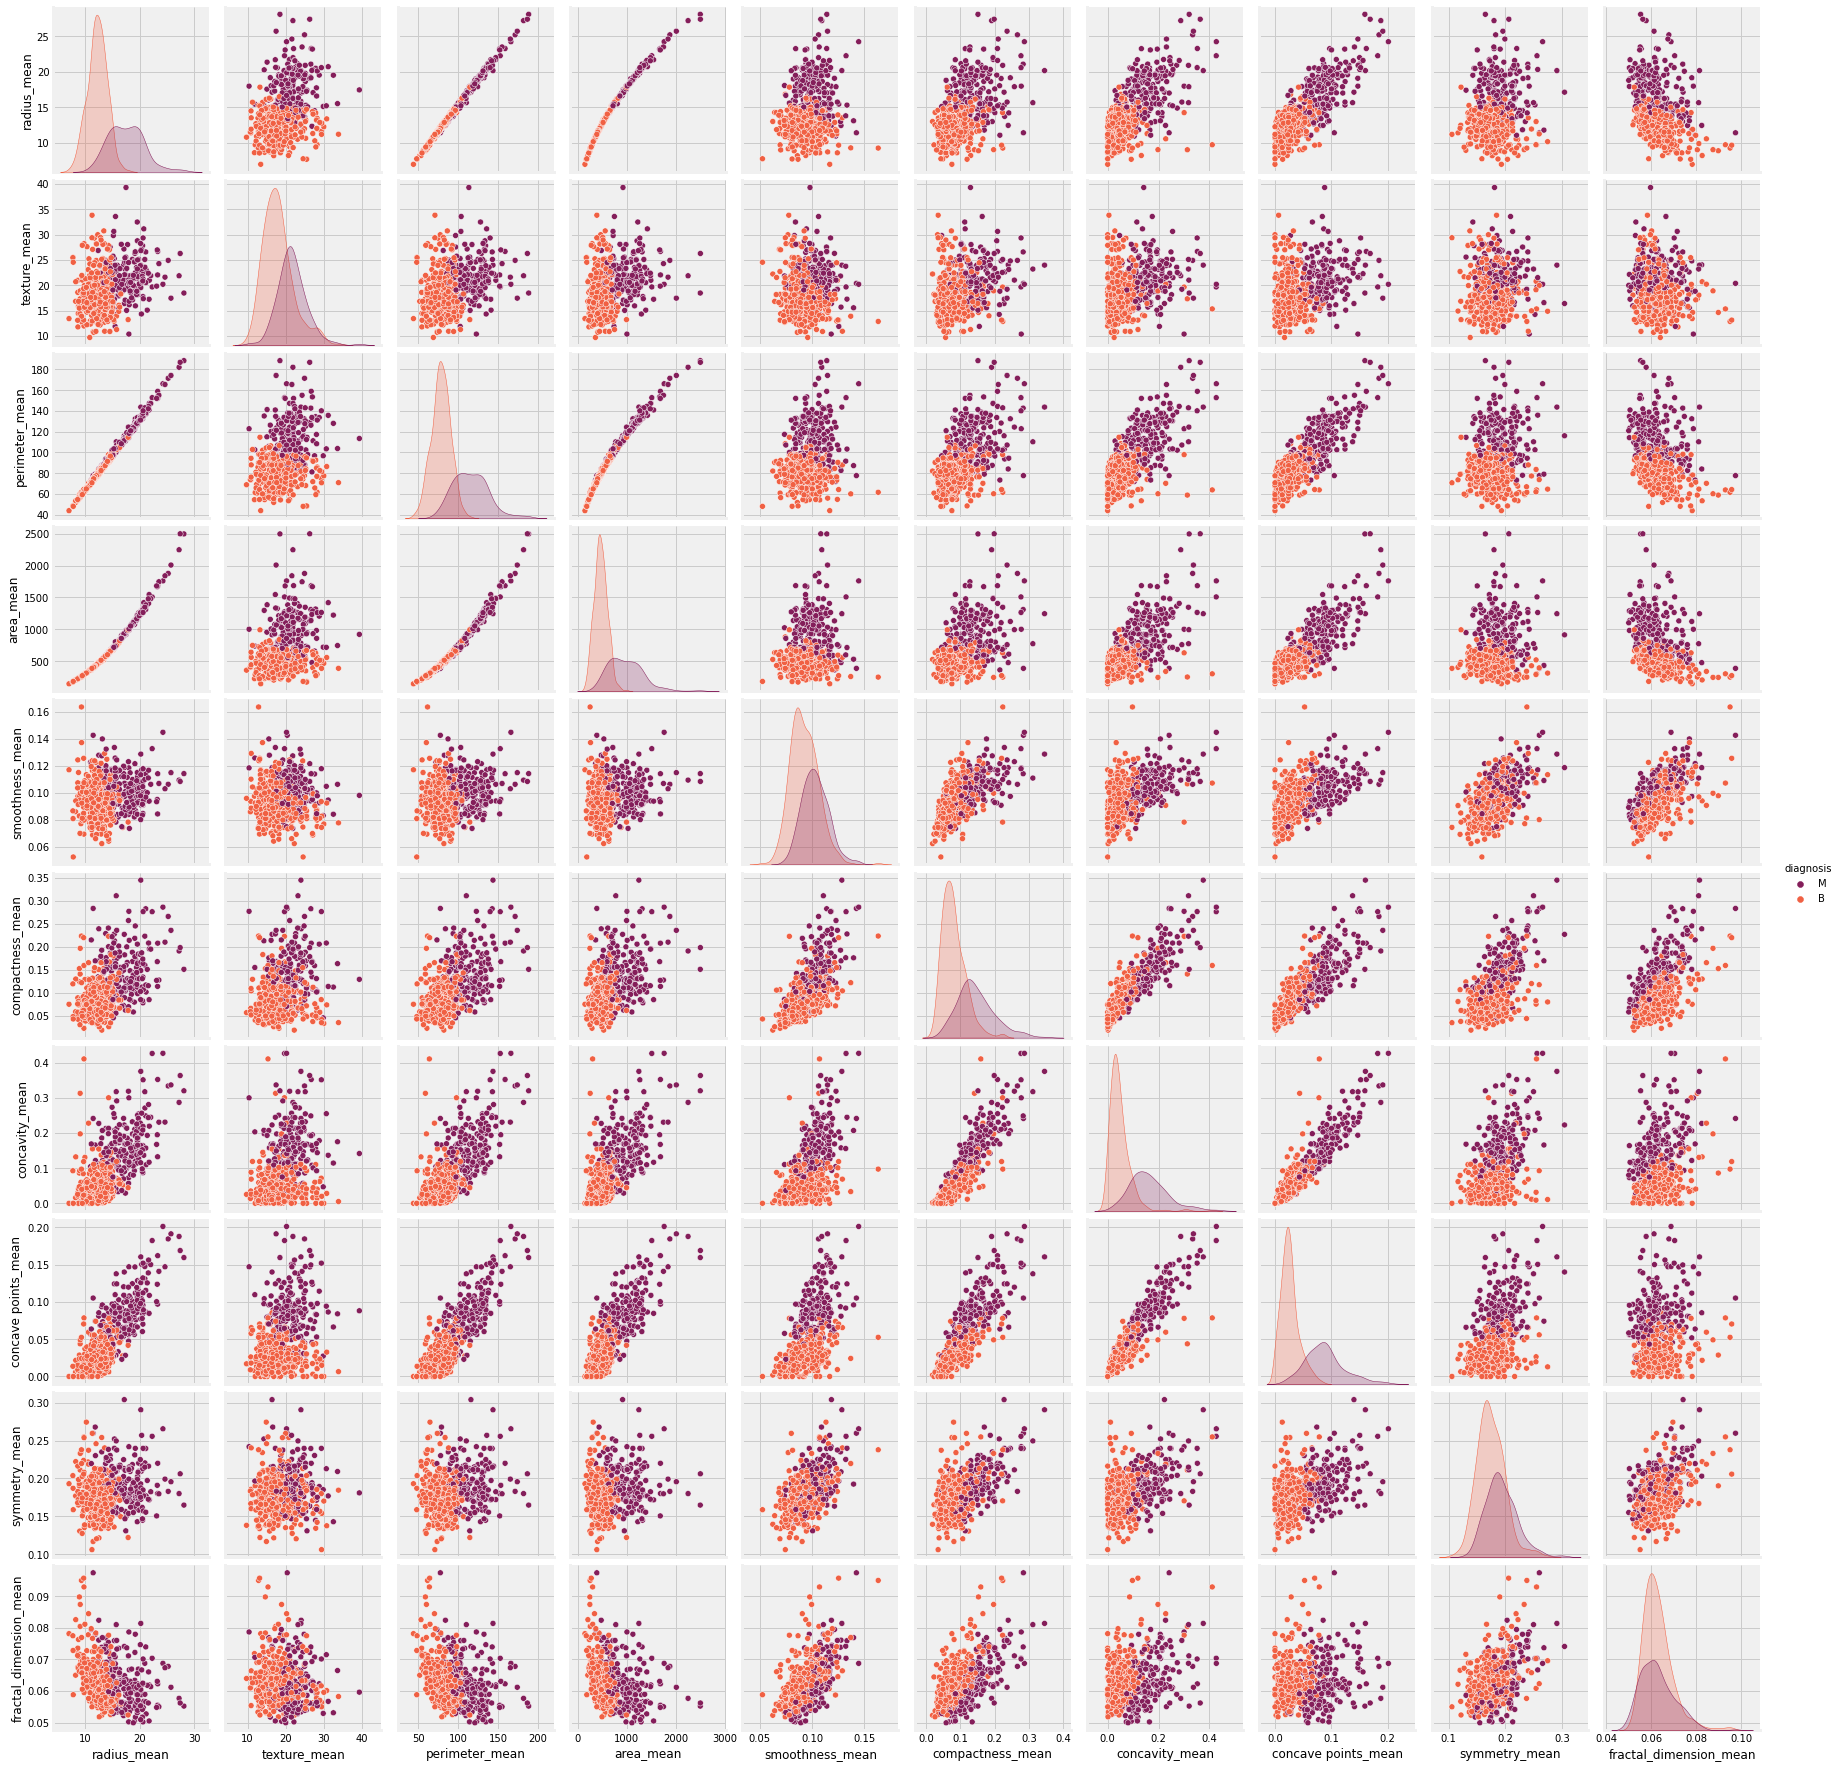

In [70]:
columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

sns.pairplot(data=df[columns], hue="diagnosis", palette='rocket')

We see that perimeter_mean and area_mean are positively correlated.

Plotting the distribution density:

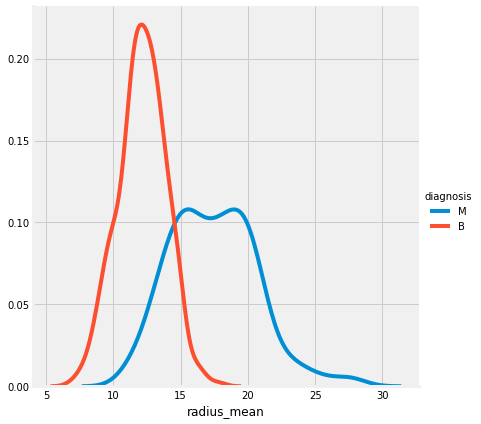

In [71]:
# Distribution density plot KDE (kernel density estimate)
sns.FacetGrid(df, hue="diagnosis", height=6).map(sns.kdeplot, "radius_mean").add_legend()
plt.show()

Plotting the distribution of the mean radius

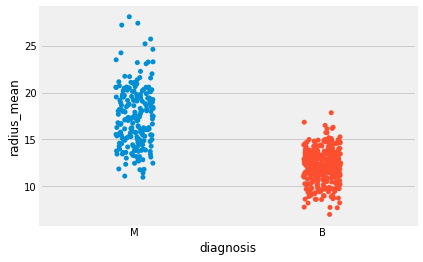

In [72]:
# Plotting the distribution of the mean radius
sns.stripplot(x="diagnosis", y="radius_mean", data=df, jitter=True, edgecolor="gray")
plt.show()

In [73]:
fig = px.pie(df, values='radius_mean', names='diagnosis', title='Relation')
fig.show()

## Positive Correlation

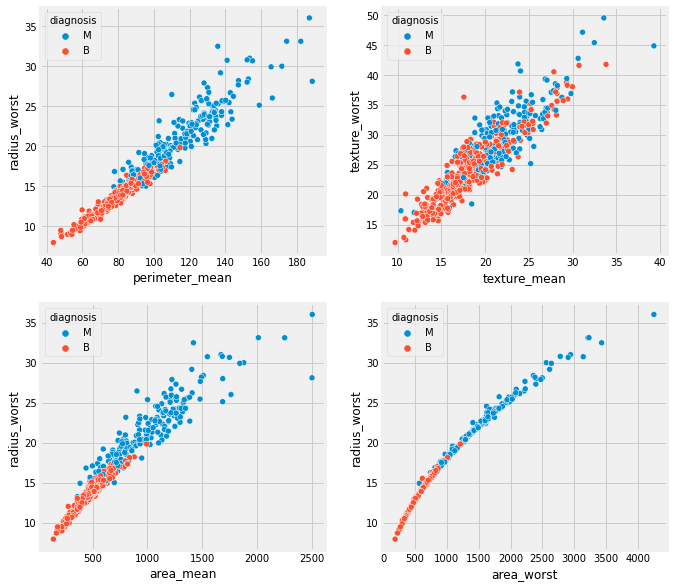

In [74]:
#postive correlation
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.scatterplot(x='perimeter_mean',y='radius_worst',data=df,hue='diagnosis',ax=ax[0][0])
sns.scatterplot(x='area_mean',y='radius_worst',data=df,hue='diagnosis',ax=ax[1][0])
sns.scatterplot(x='texture_mean',y='texture_worst',data=df,hue='diagnosis',ax=ax[0][1])
sns.scatterplot(x='area_worst',y='radius_worst',data=df,hue='diagnosis',ax=ax[1][1])
plt.show()

## Negative Correlation

<AxesSubplot:xlabel='area_mean', ylabel='smoothness_se'>

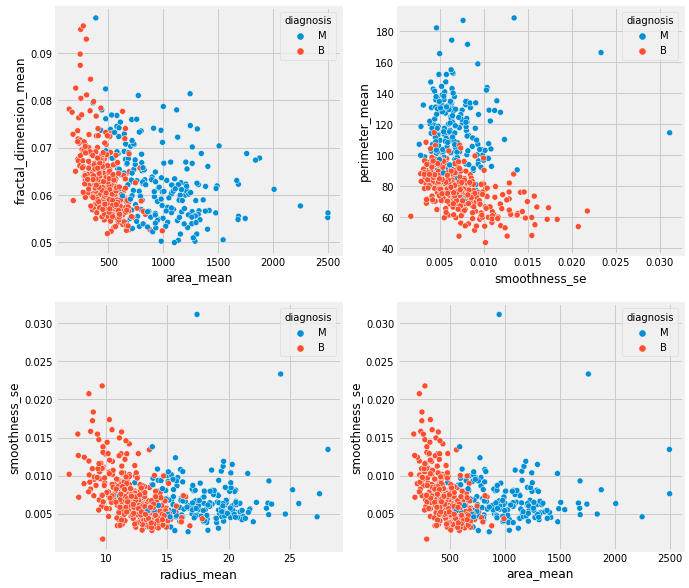

In [75]:
#negative correlation
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.scatterplot(x='area_mean',y='fractal_dimension_mean',data=df,hue='diagnosis',ax=ax[0][0])
sns.scatterplot(x='radius_mean',y='smoothness_se',data=df,hue='diagnosis',ax=ax[1][0])
sns.scatterplot(x='smoothness_se',y='perimeter_mean',data=df,hue='diagnosis',ax=ax[0][1])
sns.scatterplot(x='area_mean',y='smoothness_se',data=df,hue='diagnosis',ax=ax[1][1])

## Scatter Plot

In [76]:
fig = px.scatter(df,x='radius_mean',y='perimeter_mean',color='diagnosis',size_max=50)
fig.show()

In [77]:
fig2=px.scatter(df,x='texture_worst',y= 'symmetry_worst',color='diagnosis',size_max=50)
fig2.show()

## Distribution plot

In [78]:
import plotly.figure_factory as ff


hist_data = [df['radius_mean']]
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

## Correlation Matrix

<AxesSubplot:>

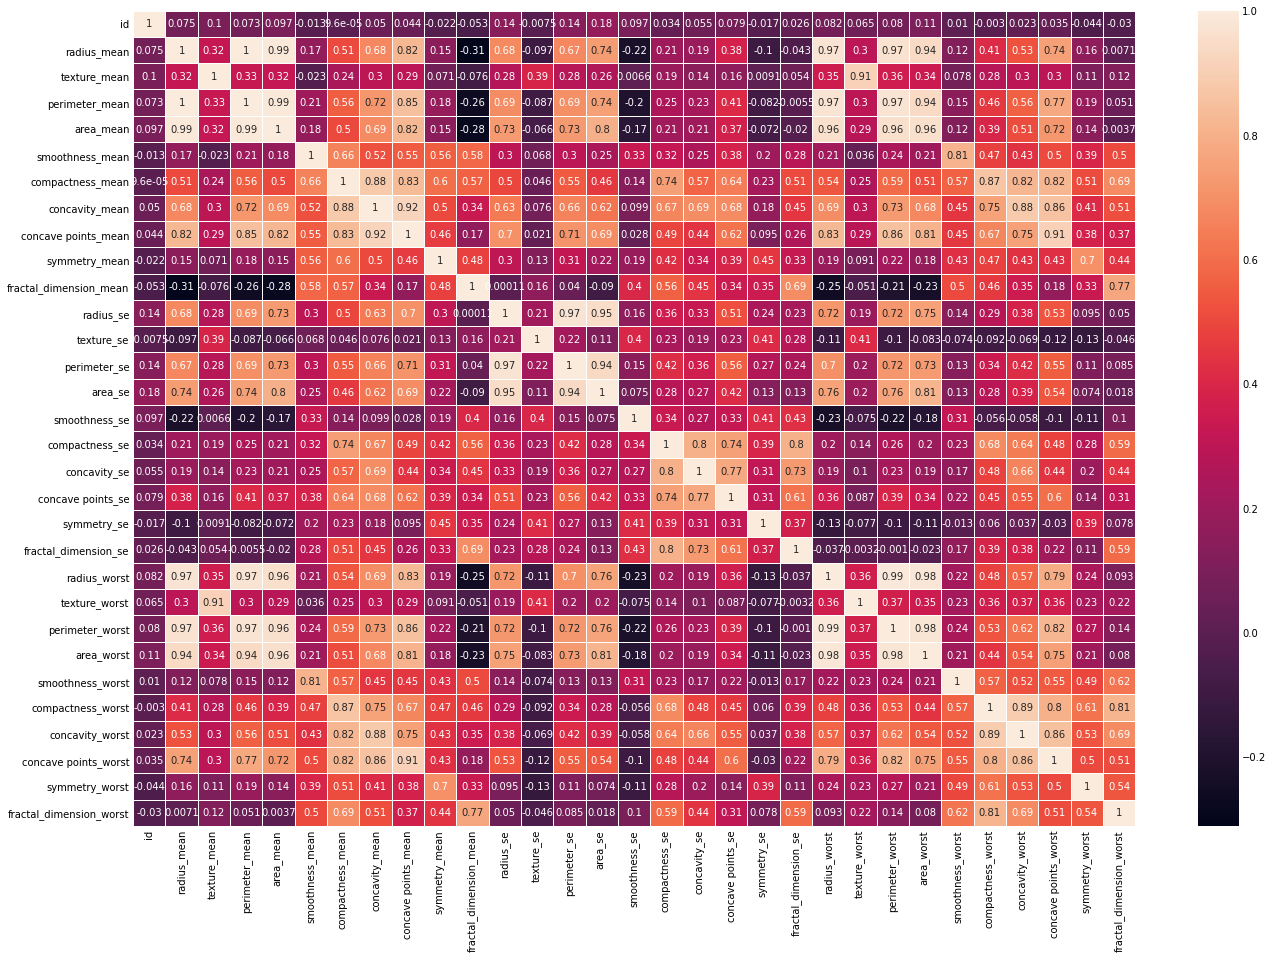

In [79]:
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df.corr(),ax=ax,annot=True,linewidth=.5)

# Data Preprocessing for FIM

In [ ]:
To give the data as an input for dynamic itemset mining, we need to convert it to either 1s and 0s or boolean values. Hence we need to encode the data.

In [80]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Data Encoding

In [ ]:
The data frame is encoded to 1s and 0s:

In [81]:
from mlxtend.preprocessing import TransactionEncoder

import pandas as pd
te = TransactionEncoder()
te_ary = te.fit(df).transform(df)
te_ary = te_ary.astype("int")
df1 = pd.DataFrame(te_ary, columns=te.columns_)
df1

,,_,a,c,d,e,f,g,h,i,...,o,p,r,s,t,u,v,w,x,y
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,0
2,0,1,1,0,1,1,0,0,0,1,...,0,0,1,1,0,1,0,0,0,0
3,0,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,1,0,0,1,0
4,0,1,1,0,0,1,0,0,0,1,...,0,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Testing frequent itemset mining with the apriori algorithm.

In [82]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

freq_itemsets = apriori(df1, min_support = 0.04, use_colnames = True)
freq_itemsets

,support,itemsets
0,0.052724,(_)
1,0.040422,(a)
2,0.049209,(e)
3,0.047452,(s)
4,0.045694,(t)
5,0.049209,"(_, e)"
6,0.045694,"(s, _)"
7,0.045694,"(_, t)"
8,0.042179,"(s, e)"
9,0.042179,"(e, t)"


# Dynamic Itemset Counting

In [ ]:
Implement dynamic itemset counting:

In [ ]:
As the dataset has a large number of features, DIC is implemented on a subset of the dataframe:

In [83]:
df2 = df1.iloc[0:6,]
#taking first seven columns to apply dic algorithm

In [84]:
database = df2.to_numpy()
unique_itemset =[{1},{2},{3},{4},{5},{6},{7}]
min_supp = 1
M = 2
size = len(database)

In [85]:
import numpy as np
import itertools 
import copy

def get_subset(S,n):
    a = itertools.combinations(S,n)
    results = []
    for i in a:
        results.append(set(i))
    return(results)

def get_superset(S,unique_itemset):
    #print(S)
    result = []
    a = set()
    for i in unique_itemset:
        if i.intersection(S)==set():
            a = i.union(S)
            result.append(a)
            a = set()

    return(result)

In [86]:
def check_subset(Set,frequent_set):
    subset = get_subset(Set,len(Set)-1)
    flag = 1
    temp = []

    for i in frequent_set:
        temp.append(i[0])

    frequent_set = temp
    for i in subset:
        if i not in frequent_set:
            flag=0
            break

    if flag:
        return(True)
    else:
        return(False)

def get_itemset(T):
    result = set()
    for i in range(len(T)):
        if T[i]!=0:
            result.add(i+1)

    return(result)

In [87]:
DC = []
DS = []
SC = []
SS = []

for i in unique_itemset:
    DC.append([i,0,0])

print("Initial DC:",DC,"\n")

counter = 0
T = []
while len(DC)!=0 or len(DS)!=0:

    for i in range(counter,counter+M):
        index = i%size
        T = get_itemset(database[index])
        print("Transaction :",T)

        for item in DC:
            item[2]+=1
            if item[0].issubset(T):
                item[1]+=1
        for item in DS:
            item[2]+=1
            if item[0].issubset(T):
                item[1]+=1

    for item in copy.copy(DC):
        if(item[1]>=min_supp):
            DS.append(item)
            DC.remove(item)

    for item in copy.copy(DS):
        if(item[2]==size):
            SS.append(item)
            DS.remove(item)
    for item in copy.copy(DC):
        if(item[2]==size):
            SC.append(item)
            DC.remove(item)

    frequent_set = copy.copy(DS)
    frequent_set.extend(SS)
    for item in frequent_set:
        S = get_superset(item[0],unique_itemset)
        for i in S:
            if (check_subset(i,frequent_set)):
                flag=1
                for x in DC:
                    if x[0]==i:
                        flag=0
                for x in DS:
                    if x[0]==i:
                        flag=0
                for x in SC:
                    if x[0]==i:
                        flag=0
                for x in SS:
                    if x[0]==i:
                        flag=0
                if flag:
                    DC.append([i,0,0])

    counter+=M
    print("DS: ",DS)
    print("DC: ",DC)
    print("SS: ",SS)
    print("SC: ",SC,"\n")

Initial DC: [[{1}, 0, 0], [{2}, 0, 0], [{3}, 0, 0], [{4}, 0, 0], [{5}, 0, 0], [{6}, 0, 0], [{7}, 0, 0]] 

Transaction : {10, 5}
Transaction : {3, 5, 8, 10, 13, 14, 17}
DS:  [[{3}, 1, 2], [{5}, 2, 2]]
DC:  [[{1}, 0, 2], [{2}, 0, 2], [{4}, 0, 2], [{6}, 0, 2], [{7}, 0, 2], [{3, 5}, 0, 0]]
SS:  []
SC:  [] 

Transaction : {2, 3, 5, 6, 10, 12, 13, 16, 17, 19}
Transaction : {2, 3, 6, 12, 13, 16, 18, 19, 22}
DS:  [[{3}, 3, 4], [{5}, 3, 4], [{2}, 2, 4], [{6}, 2, 4], [{3, 5}, 1, 2]]
DC:  [[{1}, 0, 4], [{4}, 0, 4], [{7}, 0, 4], [{2, 3}, 0, 0], [{3, 6}, 0, 0], [{2, 5}, 0, 0], [{5, 6}, 0, 0], [{2, 6}, 0, 0]]
SS:  []
SC:  [] 

Transaction : {2, 3, 6, 10, 12, 13, 15, 16, 18}
Transaction : {2, 3, 6, 12, 13, 16}
DS:  [[{3, 5}, 1, 4], [{2, 3}, 2, 2], [{3, 6}, 2, 2], [{2, 6}, 2, 2]]
DC:  [[{2, 5}, 0, 2], [{5, 6}, 0, 2], [{2, 3, 6}, 0, 0]]
SS:  [[{3}, 5, 6], [{5}, 3, 6], [{2}, 4, 6], [{6}, 4, 6]]
SC:  [[{1}, 0, 6], [{4}, 0, 6], [{7}, 0, 6]] 

Transaction : {10, 5}
Transaction : {3, 5, 8, 10, 13, 14, 17}
D

# Data Preprocessing for Classification and Clustering

For classification we need to split the data into test and train parts.

In [88]:
X=df.iloc[:,2:].values
y=df.iloc[:,1].values

In [89]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
labelencode = LabelEncoder()
y=labelencode.fit_transform(y)

In [90]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [91]:
#applying standard scaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# k-NN Classification

In [92]:
X_train

array([[-0.75450089,  1.01659115, -0.73128733, ..., -0.27255521,
        -1.22412178,  0.24637476],
       [-0.10731754, -1.37755096, -0.16735748, ..., -0.87152919,
        -0.08199343, -0.89975242],
       [ 0.8720484 ,  0.59885153,  0.81306413, ...,  1.31190285,
         0.54930958, -0.44082843],
       ...,
       [-0.59986416,  0.74483581, -0.55511131, ..., -0.0754895 ,
        -1.09721863,  0.61126664],
       [ 1.80273241,  0.53372009,  1.73767584, ...,  0.97127625,
        -0.4257564 , -0.93464483],
       [-0.6886371 , -1.05863146, -0.6567353 , ..., -0.13148291,
        -0.43378824,  0.92470699]])

In [93]:
X_test

array([[-0.82895561, -1.03841826, -0.86206574, ..., -1.51467576,
        -0.09484438, -0.53072076],
       [-1.26079299, -0.8385321 , -1.2735596 , ..., -0.97153965,
        -0.05307879, -0.08303331],
       [ 0.97227591, -0.01877424,  0.95883624, ...,  1.24191108,
         0.08667531, -0.26518355],
       ...,
       [ 1.41041331,  1.2142314 ,  1.50860537, ...,  2.1035875 ,
         2.88497009,  1.22099683],
       [ 1.72827769,  0.03063582,  1.73767584, ...,  1.60586827,
         0.25373769, -0.142173  ],
       [-0.9148649 ,  0.43714588, -0.84040817, ...,  0.4408942 ,
         0.1445046 ,  0.76325564]])

In [94]:
y_train

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [95]:
y_test

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1])

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
#k = 7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [98]:
print(knn.score(X_test, y_test))

0.9766081871345029


In [100]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != predictions).sum()))

Number of mislabeled points out of a total 171 points : 4


In [101]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9766081871345029


A high score of 97% was produced when number of neighbours = 7

# k-Means Clustering

In [102]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [103]:
kmeans.cluster_centers_

array([[1.25562991e+01, 1.85703653e+01, 8.11234703e+01, 4.96061872e+02,
        9.48844977e-02, 9.10998174e-02, 6.24377642e-02, 3.34325434e-02,
        1.78057991e-01, 6.34540183e-02, 3.04190868e-01, 1.21515320e+00,
        2.15288059e+00, 2.37852922e+01, 7.17326256e-03, 2.34746895e-02,
        2.87455128e-02, 1.06363242e-02, 2.06135799e-02, 3.74750297e-03,
        1.40439018e+01, 2.47095434e+01, 9.19375114e+01, 6.19647945e+02,
        1.29959110e-01, 2.23311758e-01, 2.19214947e-01, 9.13298425e-02,
        2.83553653e-01, 8.32819406e-02],
       [1.93799237e+01, 2.16945802e+01, 1.28231298e+02, 1.18592977e+03,
        1.01294580e-01, 1.48612977e-01, 1.76939466e-01, 1.00698779e-01,
        1.91539695e-01, 6.06029008e-02, 7.42803817e-01, 1.22253817e+00,
        5.25058015e+00, 9.56781679e+01, 6.59868702e-03, 3.21766947e-02,
        4.24197710e-02, 1.56739847e-02, 2.03039695e-02, 3.95338931e-03,
        2.37094656e+01, 2.89126718e+01, 1.58496183e+02, 1.75302290e+03,
        1.40424733e-01,

In [104]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 486 out of 569 samples were correctly labeled.


In [105]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.85


A high accuracy of 85% was obtained when number of clusters = 2